# 지위위계

In [35]:
import pandas as pd
from pathlib import Path
import re

# 현장데이터 폴더 경로 지정
base_path = Path(r"C:\Users\qndba\peer\현장데이터")
def extract_class_number(path):
    match = re.search(r'class_(\d+)', path.stem)
    return int(match.group(1)) if match else float('inf')
    
# class로 시작하고 .csv 확장자인 파일 모두 찾기
excel_files = sorted(base_path.rglob("*class*.csv"), key=extract_class_number)

# 데이터프레임을 담을 리스트
dfs = []

for file in excel_files:
    try:
        print(file)
        df = pd.read_csv(file)
        df = df.iloc[:, 1:]
        dfs.append(df)
    except Exception as e:
        print(f"파일 {file.name} 에서 오류 발생: {e}")

C:\Users\qndba\peer\현장데이터\class_1.csv
C:\Users\qndba\peer\현장데이터\class_2.csv
C:\Users\qndba\peer\현장데이터\class_3.csv
C:\Users\qndba\peer\현장데이터\class_4.csv
C:\Users\qndba\peer\현장데이터\class_5.csv
C:\Users\qndba\peer\현장데이터\class_6.csv
C:\Users\qndba\peer\현장데이터\class_7.csv
C:\Users\qndba\peer\현장데이터\class_8.csv
C:\Users\qndba\peer\현장데이터\class_9.csv
C:\Users\qndba\peer\현장데이터\class_10.csv
C:\Users\qndba\peer\현장데이터\class_11.csv
C:\Users\qndba\peer\현장데이터\class_12.csv
C:\Users\qndba\peer\현장데이터\class_13.csv
C:\Users\qndba\peer\현장데이터\class_14.csv
C:\Users\qndba\peer\현장데이터\class_15.csv
C:\Users\qndba\peer\현장데이터\class_16.csv
C:\Users\qndba\peer\현장데이터\class_17.csv
C:\Users\qndba\peer\현장데이터\class_18.csv
C:\Users\qndba\peer\현장데이터\class_19.csv
C:\Users\qndba\peer\현장데이터\class_20.csv


In [55]:
for i, df in enumerate(dfs):
    print(f"\n📄 클래스 {i+1} 요약 ----------------------------")
    print(f"총 행 수: {df.shape[0]}")
    print(f"총 열 수: {df.shape[1]}")


📄 클래스 1 요약 ----------------------------
총 행 수: 333
총 열 수: 3

📄 클래스 2 요약 ----------------------------
총 행 수: 756
총 열 수: 3

📄 클래스 3 요약 ----------------------------
총 행 수: 612
총 열 수: 3

📄 클래스 4 요약 ----------------------------
총 행 수: 561
총 열 수: 3

📄 클래스 5 요약 ----------------------------
총 행 수: 637
총 열 수: 3

📄 클래스 6 요약 ----------------------------
총 행 수: 384
총 열 수: 3

📄 클래스 7 요약 ----------------------------
총 행 수: 728
총 열 수: 3

📄 클래스 8 요약 ----------------------------
총 행 수: 604
총 열 수: 3

📄 클래스 9 요약 ----------------------------
총 행 수: 431
총 열 수: 3

📄 클래스 10 요약 ----------------------------
총 행 수: 513
총 열 수: 3

📄 클래스 11 요약 ----------------------------
총 행 수: 420
총 열 수: 3

📄 클래스 12 요약 ----------------------------
총 행 수: 355
총 열 수: 3

📄 클래스 13 요약 ----------------------------
총 행 수: 345
총 열 수: 3

📄 클래스 14 요약 ----------------------------
총 행 수: 235
총 열 수: 3

📄 클래스 15 요약 ----------------------------
총 행 수: 332
총 열 수: 3

📄 클래스 16 요약 ----------------------------
총 행 수: 332
총 열 수: 3

📄 클래스 17 요약 ----

In [58]:
total_classes = len(dfs)
print(f"전체 클래스 수: {total_classes}개")

total_rows = sum(df.shape[0] for df in dfs)
print(f"모든 클래스의 총 응답 수(행 수): {total_rows}명")

전체 클래스 수: 20개
모든 클래스의 총 응답 수(행 수): 8946명


In [59]:
avg_rows = total_rows / total_classes
print(f"클래스당 평균 응답자 수: {avg_rows:.2f}명")

클래스당 평균 응답자 수: 447.30명


In [61]:
# 각 반의 고유한 응답자(student_designation) 수
class_sizes = [df['student_designation'].nunique() for df in dfs]

# 반당 평균 학생 수 계산
avg_class_size = sum(class_sizes) / len(class_sizes)

print(f"📈 반당 평균 학생 수 (유니크 기준): {avg_class_size:.2f}명")

📈 반당 평균 학생 수 (유니크 기준): 22.40명


In [85]:
def point_ratio_score(point_df, item, name):
    if not item :
        return 0
    else :
        item='|'.join(item)
        temp_df=point_df[point_df['point_item_no'].str.fullmatch(item)]
        ratio = round(len(temp_df[temp_df['student_nomination']==name])/(len(temp_df)),2)
        print('지명된 횟수 :', len(temp_df[temp_df['student_nomination']==name]), '지명 가능한 수 :', (len(temp_df)))
    return ratio

In [86]:
point_ratio_score(dfs[0], ['PN1'], '521정***타')

지명된 횟수 : 17 지명 가능한 수 : 80


0.21

In [87]:
# 지위위계 산출 함수
def status_hierarchy(point_df, item) :
    item_pattern = '|'.join(item)
    temp_df = point_df[point_df['point_item_no'].str.fullmatch(item_pattern)]

    # 각 학생에 대해 비율 점수 계산
    ratio_scores = []
    student_names = temp_df['student_designation'].unique().tolist()
    for name in student_names:
        print(name)
        ratio = point_ratio_score(point_df, item, name)
        ratio_scores.append(ratio)

    std_score = pd.Series(ratio_scores).std()
    print(std_score)

    return std_score, pd.Series(ratio_scores, index=student_names)

In [97]:
status_score, ratio_by_student = status_hierarchy(dfs[18], ['PN1'])

41강*원
지명된 횟수 : 4 지명 가능한 수 : 142
42권*연
지명된 횟수 : 6 지명 가능한 수 : 142
43김*담
지명된 횟수 : 11 지명 가능한 수 : 142
44김*완
지명된 횟수 : 6 지명 가능한 수 : 142
45김*주
지명된 횟수 : 4 지명 가능한 수 : 142
46문*진
지명된 횟수 : 6 지명 가능한 수 : 142
47박*서
지명된 횟수 : 5 지명 가능한 수 : 142
48박*주
지명된 횟수 : 11 지명 가능한 수 : 142
49배*
지명된 횟수 : 6 지명 가능한 수 : 142
410서*호
지명된 횟수 : 10 지명 가능한 수 : 142
411손*원
지명된 횟수 : 4 지명 가능한 수 : 142
413신*은
지명된 횟수 : 5 지명 가능한 수 : 142
415이*희
지명된 횟수 : 5 지명 가능한 수 : 142
416이*은
지명된 횟수 : 10 지명 가능한 수 : 142
417이*준
지명된 횟수 : 7 지명 가능한 수 : 142
419전*준
지명된 횟수 : 9 지명 가능한 수 : 142
421조*윤
지명된 횟수 : 9 지명 가능한 수 : 142
0.017128407776006983


In [90]:
ratio_by_student

51강*욱       0.05
52곽*중       0.05
53김*재       0.04
54김*은       0.01
55김*우       0.01
56김*홍       0.04
57김*윤       0.05
58박*형       0.05
59박*린       0.01
510박*우      0.07
511박*유      0.01
513서*웅      0.04
514오*서      0.04
516이*영      0.01
517이*       0.03
518*훈       0.03
519장*준      0.01
520장*수      0.05
521정***타    0.21
523진*랑      0.07
524최*원      0.04
525최*예      0.04
526홍*경      0.01
dtype: float64

In [91]:
status_scores = []

for i, df in enumerate(dfs):
    try:
        std_score, _ = status_hierarchy(df, ['PN1'])
        status_scores.append({'class_index': i+1, 'status_score': std_score})
    except Exception as e:
        print(f"학급 {i+1} 처리 중 오류 발생: {e}")

51강*욱
지명된 횟수 : 4 지명 가능한 수 : 80
52곽*중
지명된 횟수 : 4 지명 가능한 수 : 80
53김*재
지명된 횟수 : 3 지명 가능한 수 : 80
54김*은
지명된 횟수 : 1 지명 가능한 수 : 80
55김*우
지명된 횟수 : 1 지명 가능한 수 : 80
56김*홍
지명된 횟수 : 3 지명 가능한 수 : 80
57김*윤
지명된 횟수 : 4 지명 가능한 수 : 80
58박*형
지명된 횟수 : 4 지명 가능한 수 : 80
59박*린
지명된 횟수 : 1 지명 가능한 수 : 80
510박*우
지명된 횟수 : 6 지명 가능한 수 : 80
511박*유
지명된 횟수 : 1 지명 가능한 수 : 80
513서*웅
지명된 횟수 : 3 지명 가능한 수 : 80
514오*서
지명된 횟수 : 3 지명 가능한 수 : 80
516이*영
지명된 횟수 : 1 지명 가능한 수 : 80
517이*
지명된 횟수 : 2 지명 가능한 수 : 80
518*훈
지명된 횟수 : 2 지명 가능한 수 : 80
519장*준
지명된 횟수 : 1 지명 가능한 수 : 80
520장*수
지명된 횟수 : 4 지명 가능한 수 : 80
521정***타
지명된 횟수 : 17 지명 가능한 수 : 80
523진*랑
지명된 횟수 : 6 지명 가능한 수 : 80
524최*원
지명된 횟수 : 3 지명 가능한 수 : 80
525최*예
지명된 횟수 : 3 지명 가능한 수 : 80
526홍*경
지명된 횟수 : 1 지명 가능한 수 : 80
0.04133637202481506
김무성
지명된 횟수 : 6 지명 가능한 수 : 148
김성윤
지명된 횟수 : 4 지명 가능한 수 : 148
서도현
지명된 횟수 : 3 지명 가능한 수 : 148
손정우
지명된 횟수 : 3 지명 가능한 수 : 148
이유준
지명된 횟수 : 5 지명 가능한 수 : 148
이한
지명된 횟수 : 5 지명 가능한 수 : 148
정민준
지명된 횟수 : 6 지명 가능한 수 : 148
정준휘
지명된 횟수 : 5 지명 가능한 수 : 148
한정우
지명된 횟수 : 

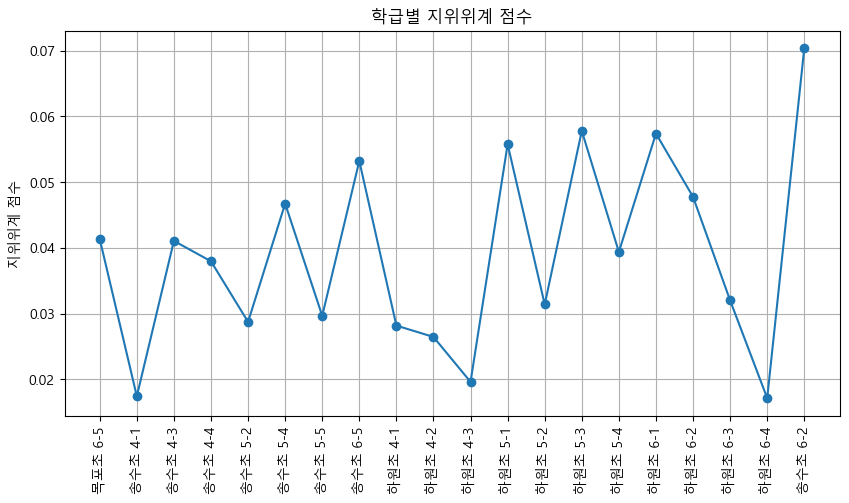

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

class_index = [
    "목포초 6-5",
    "송수초 4-1",
    "송수초 4-3",
    "송수초 4-4",
    "송수초 5-2",
    "송수초 5-4",
    "송수초 5-5",
    "송수초 6-5",
    "하원초 4-1",
    "하원초 4-2",
    "하원초 4-3",
    "하원초 5-1",
    "하원초 5-2",
    "하원초 5-3",
    "하원초 5-4",
    "하원초 6-1",
    "하원초 6-2",
    "하원초 6-3",
    "하원초 6-4",
    "송수초 6-2"]


# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(class_index, score_df['status_score'], marker='o')
plt.xlabel("")
plt.ylabel("지위위계 점수")
plt.title("학급별 지위위계 점수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [95]:
score_df['status_score']

0     0.041336
1     0.017416
2     0.041048
3     0.037947
4     0.028725
5     0.046719
6     0.029655
7     0.053200
8     0.028166
9     0.026440
10    0.019601
11    0.055751
12    0.031385
13    0.057784
14    0.039364
15    0.057374
16    0.047749
17    0.031997
18    0.017128
19    0.070366
Name: status_score, dtype: float64

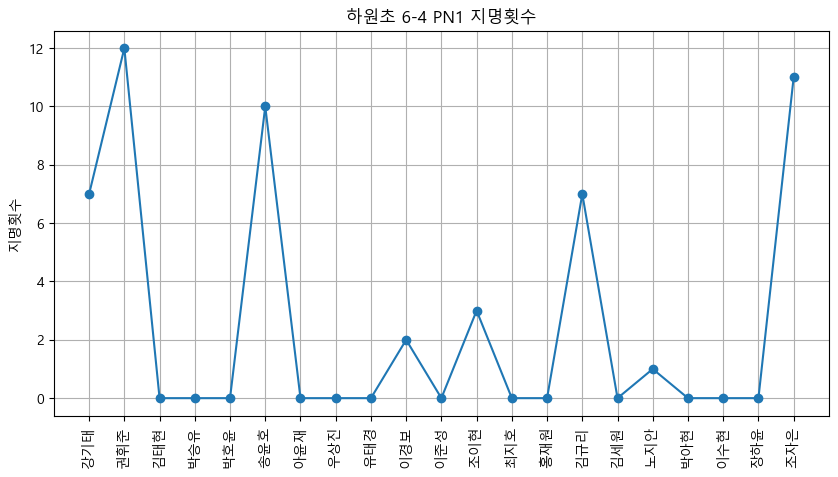

In [100]:
# 하원초 6-4 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

names = [
    "강기태", "권휘준", "김태현", "박승유", "박호윤", "송윤호", "아윤재", "우상진", "유태경", "이경보",
    "이준성", "조이현", "최지호", "홍재원", "김규리", "김세원", "노지안", "박아현", "이수현", "장하윤", "조자은"
]
counts = [7, 12, 0, 0, 0, 10, 0, 0, 0, 2, 0, 3, 0, 0, 7, 0, 1, 0, 0, 0, 11]

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(names, counts, marker='o')
plt.xlabel("")
plt.ylabel("지명횟수")
plt.title("하원초 6-4 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

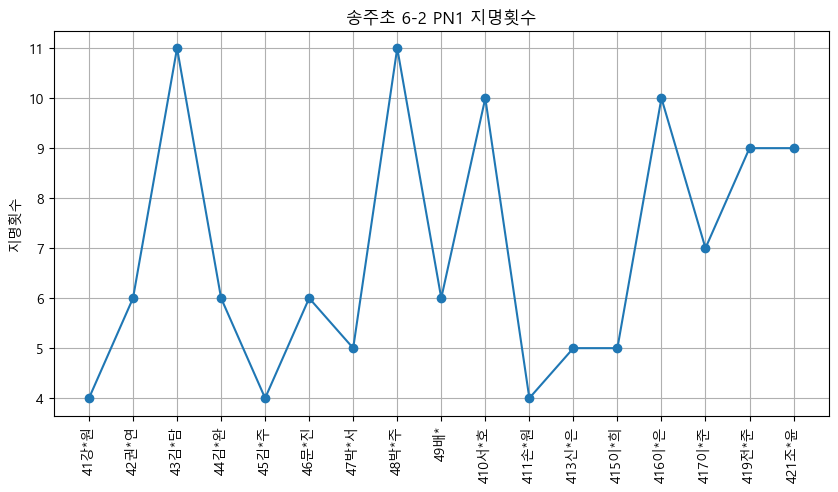

In [101]:
# 송주초 6-2 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

names = [
    "41강*원", "42권*연", "43김*담", "44김*완", "45김*주", "46문*진",
    "47박*서", "48박*주", "49배*", "410서*호", "411손*원", "413신*은",
    "415이*희", "416이*은", "417이*준", "419전*준", "421조*윤"
]
counts = [4, 6, 11, 6, 4, 6, 5, 11, 6, 10, 4, 5, 5, 10, 7, 9, 9]

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(names, counts, marker='o')
plt.xlabel("")
plt.ylabel("지명횟수")
plt.title("송주초 6-2 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [102]:
def aggression_norm_score(point_df):
    # 문항 묶음
    aggression_items = ['PN4', 'PN5', 'PN6', 'PN7']
    friend_item = ['PN14']

    student_names = point_df['student_designation'].unique()
    combined_scores = []

    for name in student_names:
        # 공격성 문항 전체 비율점수 한 번에 계산
        aggr_ratio = point_ratio_score(point_df, aggression_items, name)
        friend_ratio = point_ratio_score(point_df, friend_item, name)

        score = aggr_ratio * friend_ratio
        combined_scores.append(score)

    class_mean = round(sum(combined_scores) / len(combined_scores), 3)
    return class_mean

In [103]:
aggression_score = []

for i, df in enumerate(dfs):
    try:
        class_mean = aggression_norm_score(df)
        aggression_score.append(class_mean)
    except Exception as e:
        print(f"학급 {i+1} 처리 중 오류 발생: {e}")

지명된 횟수 : 12 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 2 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 3 지명 가능한 수 : 40
지명된 횟수 : 1 지명 가능한 수 : 69
지명된 횟수 : 4 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 6 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 2 지명 가능한 수 : 40
지명된 횟수 : 4 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 1 지명 가능한 수 : 69
지명된 횟수 : 3 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 6 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69

In [104]:
aggression_score

[0.002,
 0.001,
 0.001,
 0.001,
 0.002,
 0.001,
 0.002,
 0.002,
 0.001,
 0.001,
 0.001,
 0.002,
 0.002,
 0.001,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.001]